In [1]:
from Feeder import Feeder
from TransformerModel import Transformer
import os

In [2]:
feeder = Feeder()
gen = feeder.iterData

In [3]:
vit = Transformer()
vit.build(32, 512, 512)

2023-12-07 12:59:11.826354: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-12-07 12:59:11.826399: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-12-07 12:59:11.826416: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-12-07 12:59:11.826711: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-07 12:59:11.826789: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
vit.printSummary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 512, 512)]       0         []                            
                                                                                                  
 sequential (Sequential)     (None, 72, 72, 512)          0         ['input_1[0][0]']             
                                                                                                  
 private___patches (__Patch  (None, None, 18432)          0         ['sequential[0][0]']          
 es)                                                                                              
                                                                                                  
 private___patch_encoder (_  (None, 144, 64)              1188928   ['private___patches[0][0]'

In [5]:
import pickle
def Pickle(fileName: str, object: any) -> None:
    with open(f"{fileName}.pkl", "wb") as file:
        pickle.dump(object, file)

def UnPickle(fileName: str) -> any:
    with open(f"{fileName}.pkl", 'rb') as file:
        object = pickle.load(file)
        return object

In [6]:
loss, acc = UnPickle("vitTrainingData")

In [7]:
import pandas as pd
y_names: list = ["bowel", "extra", "liver", "kidney", "spleen"]

losses_bowel = [tensor.numpy().tolist() for tensor in loss["bowel"]]
accuracies_bowel = [tensor.numpy().tolist() for tensor in acc["bowel"]]
losses_extra = [tensor.numpy().tolist() for tensor in loss["extra"]]
accuracies_extra = [tensor.numpy().tolist() for tensor in acc["extra"]]
losses_liver = [tensor.numpy().tolist() for tensor in loss["liver"]]
accuracies_liver = [tensor.numpy().tolist() for tensor in acc["liver"]]
losses_kidney = [tensor.numpy().tolist() for tensor in loss["kidney"]]
accuracies_kidney = [tensor.numpy().tolist() for tensor in acc["kidney"]]
losses_spleen = [tensor.numpy().tolist() for tensor in loss["spleen"]]
accuracies_spleen = [tensor.numpy().tolist() for tensor in acc["spleen"]]

data = {"Epoch": list(range(0, len(losses_bowel))),
        "Loss_bowel": losses_bowel,
        "Loss_extra": losses_extra,
        "Loss_liver": losses_liver,
        "Loss_kidney": losses_kidney,
        "Loss_spleen": losses_spleen,
        "Acc_bowel": accuracies_bowel,
        "Acc_extra": accuracies_extra,
        "Acc_liver": accuracies_liver,
        "Acc_kidney": accuracies_kidney,
        "Acc_spleen": accuracies_spleen,
        }
df = pd.DataFrame(data)
df.head()

,Epoch,Loss_bowel,Loss_extra,Loss_liver,Loss_kidney,Loss_spleen,Acc_bowel,Acc_extra,Acc_liver,Acc_kidney,Acc_spleen
0,0,2.228735,2.837142,2.718556,2.705149,1.424740,0.0,0.000000,0.000000,0.0,0.000000
1,1,1.365749,0.000103,2.184137,6.299407,0.099486,0.0,0.500000,0.000000,0.0,0.500000
2,2,21.870331,8.623106,-0.000000,42.921600,0.000003,0.0,0.333333,0.333333,0.0,0.666667
3,3,17.734964,29.304951,3.249189,3.467198,-0.000000,0.0,0.250000,0.250000,0.0,0.750000
4,4,0.005284,11.724951,-0.000000,0.022085,0.000001,0.2,0.200000,0.400000,0.2,0.800000


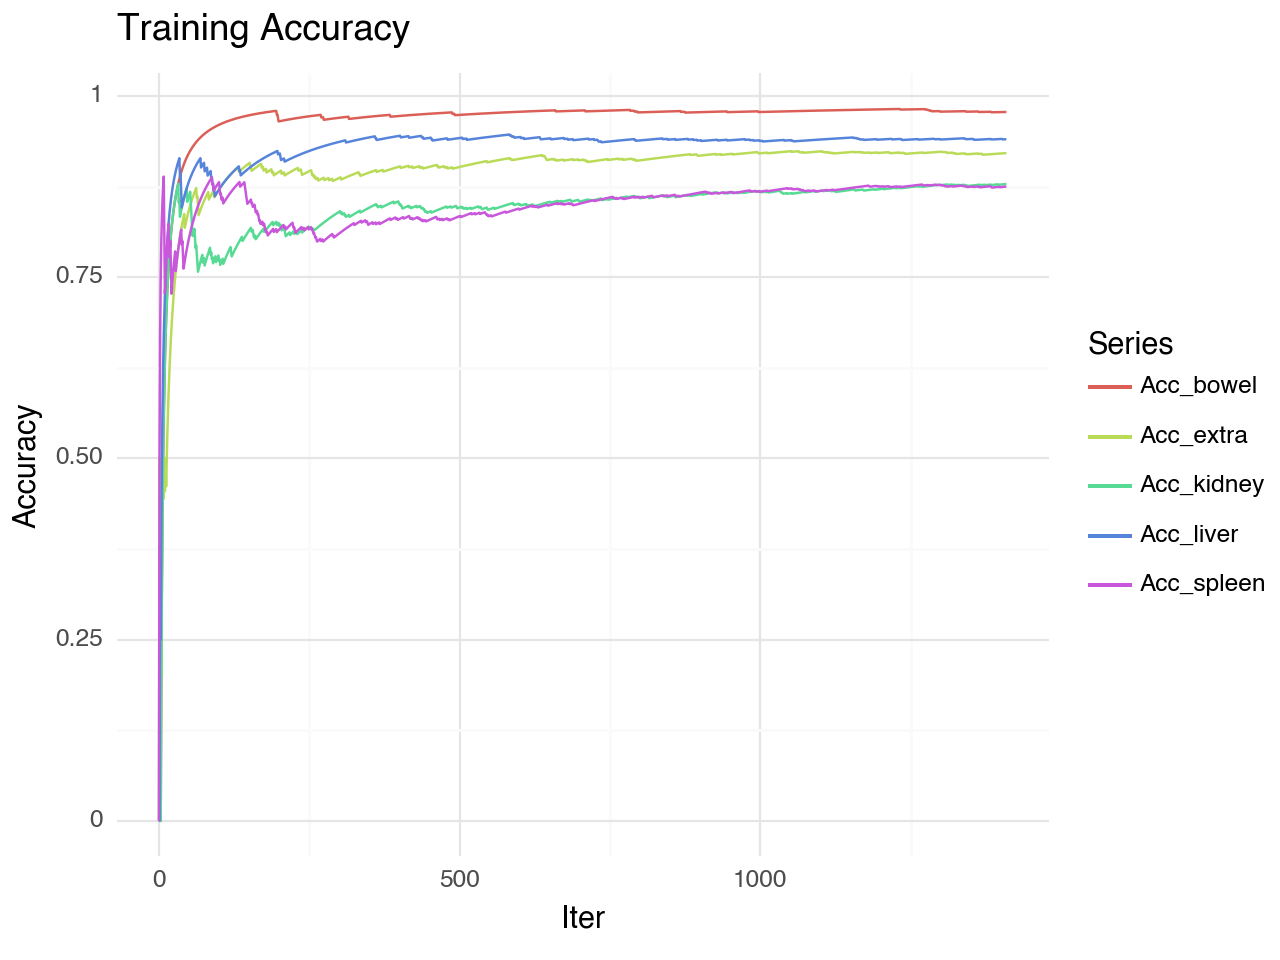

In [8]:

df_long = df[["Epoch", "Acc_bowel", "Acc_extra", "Acc_liver", "Acc_kidney", "Acc_spleen"]].melt(id_vars=['Epoch'], var_name='Series', value_name='Value')

from plotnine import ggplot, aes, geom_line, labs, theme_minimal, theme_dark, theme_classic, theme_linedraw, theme_void, theme_bw, theme_update, theme_538, theme_tufte, theme_get

plot = (ggplot(df_long, aes(x='Epoch', y='Value', color='Series'))
        + geom_line()
        + labs(title='Training Accuracy', x='Iter', y='Accuracy')
        + theme_minimal())
print(plot)

In [9]:
vit.loadWeights("ViTModel")

In [10]:
folder = "../3D_Volumes/test"
x_test, y_test = feeder.bagData(0, 100, folder)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:22<00:00,  4.53it/s]


In [11]:
vit.predictT(x_test[0])

2023-12-07 13:00:10.211705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 50s 50s/step


[array([[0.6978699 , 0.30213016]], dtype=float32),
 array([[0.5104227 , 0.48957735]], dtype=float32),
 array([[0.45255238, 0.2981109 , 0.24933665]], dtype=float32),
 array([[0.46672603, 0.2673771 , 0.2658969 ]], dtype=float32),
 array([[0.45452625, 0.24693239, 0.29854143]], dtype=float32)]